In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
left = df[df.left==1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

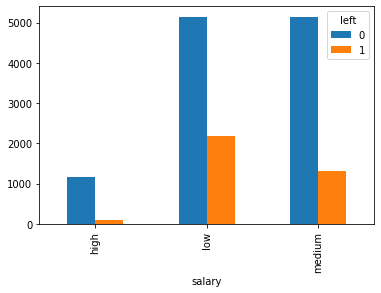

In [7]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company


### Department wise employee retention rate

<AxesSubplot:xlabel='sales'>

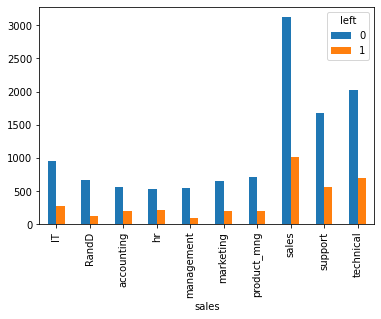

In [8]:
pd.crosstab(df.sales,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model

1. **Satisfaction Level** 

2. **Average Monthly Hours**

3. **Promotion Last 5 Years**

4. **Salary**

In [9]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


## Tackle salary dummy variable

In [10]:
dummies = pd.get_dummies(subdf.salary,prefix='Salary')
dummies

,Salary_high,Salary_low,Salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [11]:
df_wid_dummies = pd.concat([subdf,dummies],axis='columns')
df_wid_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it



In [15]:
df_wid_dummies=df_wid_dummies.drop(['salary'],axis=1)

In [16]:
df_wid_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [24]:
y = df.left
x_train,x_test,y_train,y_test=train_test_split(df_wid_dummies,y,test_size=0.25)

In [25]:
reg = LogisticRegression()

In [26]:
reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
reg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
reg.score(x_test,y_test)

0.7805333333333333